# Matplot Library

In [7]:
#importings
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

You'll also need to use this line to see plots in the notebook:

In [90]:
%matplotlib inline  

Magic function: command line

That line is only for jupyter notebooks, if you are using another editor, you'll use: **plt.show()** at the end of all your plotting commands to have the figure pop up in another window.

# Basic Example





**The data we want to plot:**

In [11]:
x=np.linspace(-10,8,10)
x

array([-10.,  -8.,  -6.,  -4.,  -2.,   0.,   2.,   4.,   6.,   8.])

In [12]:
y=x**2
y

array([100.,  64.,  36.,  16.,   4.,   0.,   4.,  16.,  36.,  64.])

## Basic Matplotlib Commands

We can create a very simple line plot using the following ( I encourage you to pause and use Shift+Tab along the way to check out the document strings for the functions we are using).

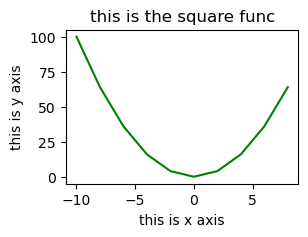

In [29]:
plt.figure(figsize=(3,2))
plt.plot(x,y,'g')
plt.xlabel('this is x axis')
plt.ylabel('this is y axis')
plt.title('this is the square func')
plt.show()         #disacard words

**Creating Multiplots on Same Canvas**

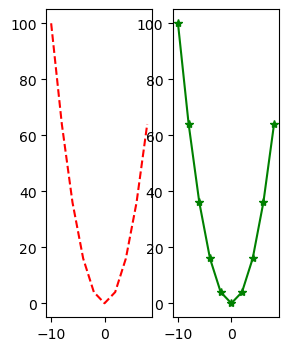

In [47]:
plt.figure(figsize=(3,4))
plt.subplot(1,2,1)    #multiple plots in one figure and the first is row the second is column
plt.plot(x,y,'r--')
plt.subplot(1,2,2)
plt.plot(x,y,'g*-') 
plt.show()

### Legends

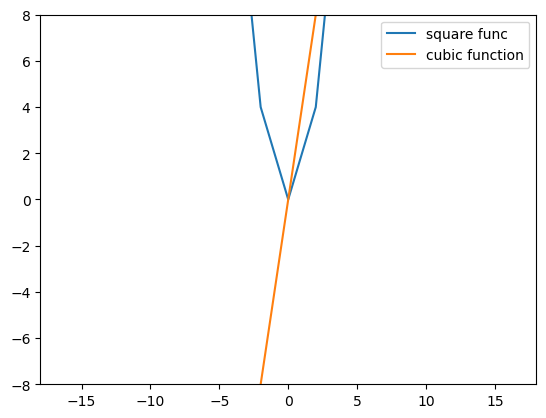

In [54]:
plt.plot(x,y,label='square func')
plt.plot(x,x**3,label='cubic function')
plt.xlim(-18,18)         #numbers of x axis
plt.ylim(-8,8)         #numbers of x axis
plt.legend()      #show the name of line

# Visualization using Seaborn

**Data loading**

In [55]:
import seaborn as sns       # as matplotlib but better

In [60]:
df=sns.load_dataset('tips')
df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [59]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


<AxesSubplot:xlabel='sex'>

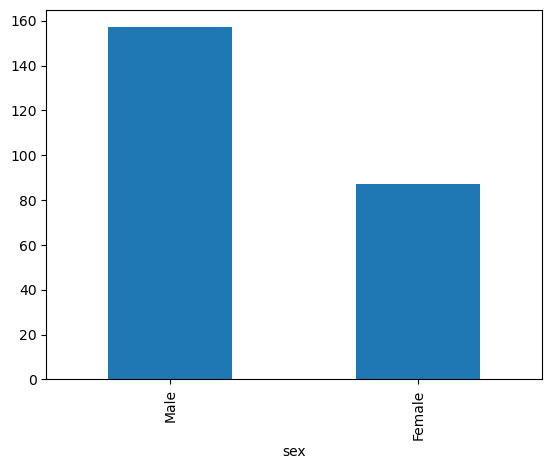

In [66]:
df.value_counts('sex').plot(kind='bar')

<AxesSubplot:xlabel='sex', ylabel='count'>

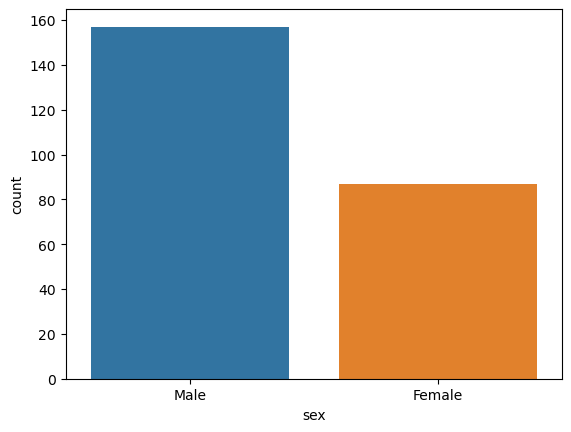

In [68]:
#x axis carry categorical
sns.countplot(x='sex',data=df)

In [69]:
df.value_counts('smoker')

smoker
No     151
Yes     93
dtype: int64

In [73]:
df.value_counts('day')

day
Sat     87
Sun     76
Thur    62
Fri     19
dtype: int64

## Categorical Data Plots

### bar plot

<AxesSubplot:xlabel='sex', ylabel='tip'>

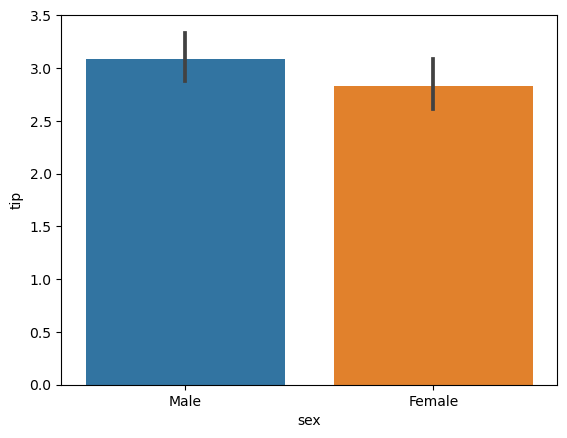

In [77]:
#compare catigorecal data with numerical data
sns.barplot(x='sex',y='tip',data=df, estimator=np.mean)     #estimator count mean

<AxesSubplot:xlabel='sex', ylabel='tip'>

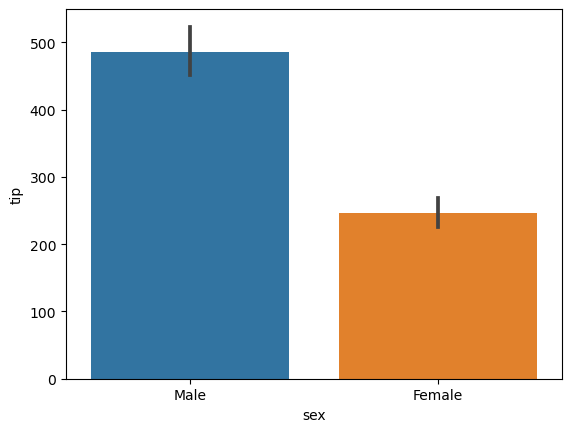

In [78]:
sns.barplot(x='sex',y='tip',data=df, estimator=np.sum)       #estimator count sum

### count plot

This is essentially the same as barplot except the estimator is explicitly counting the number of occurrences. Which is why we only pass the x value:

<AxesSubplot:xlabel='day', ylabel='count'>

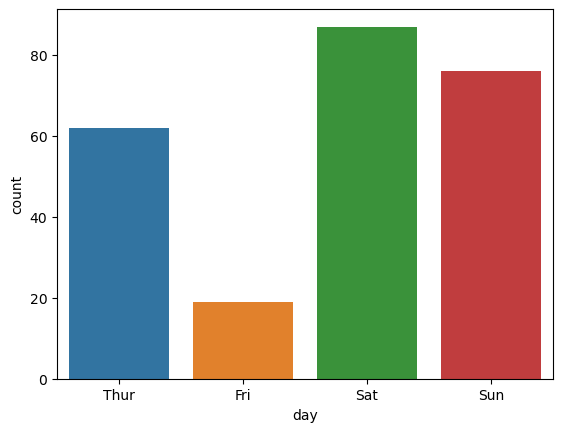

In [79]:
sns.countplot(x='day',data=df)

### boxplot

<IPython.core.display.Javascript object>


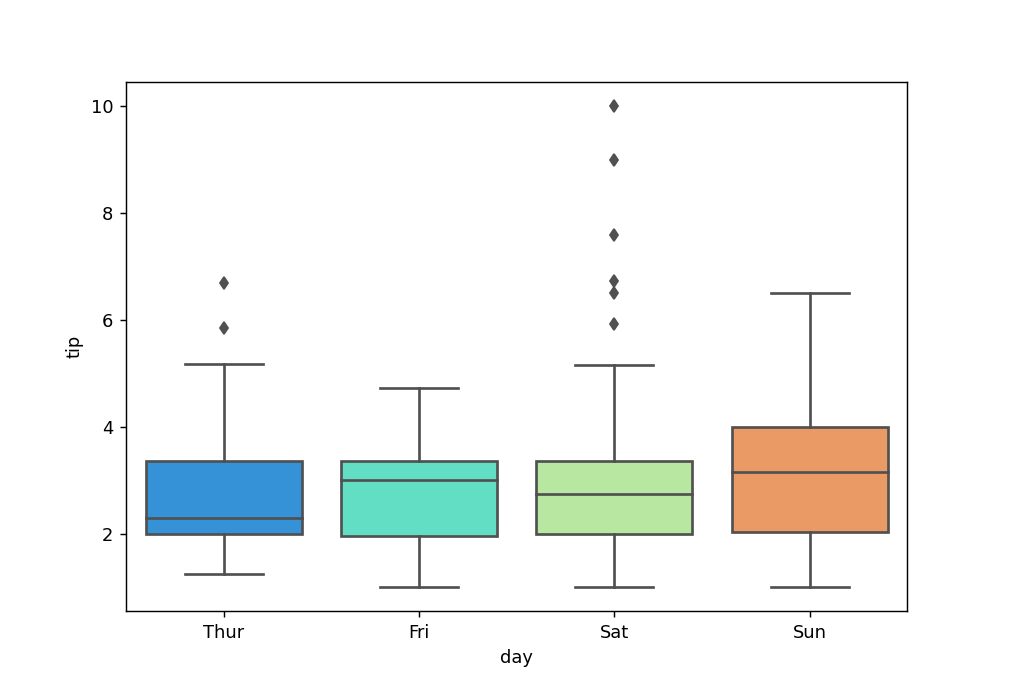

In [89]:
sns.boxplot(x='day',y='tip',data=df,palette='rainbow')
plt.show()

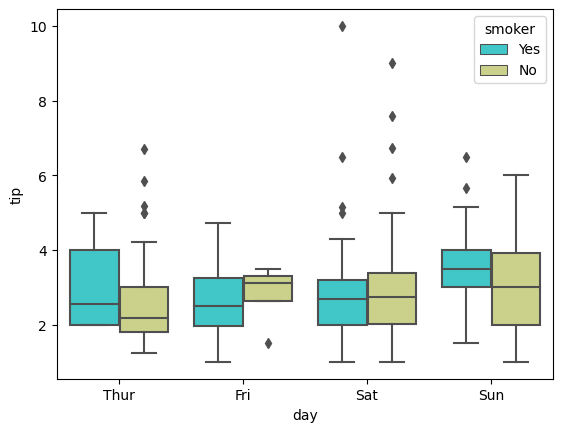

In [91]:
sns.boxplot(x='day',y='tip',data=df,palette='rainbow',hue='smoker')
plt.show()

## Distribution Plots ,numerical plots

**Scatter**

<AxesSubplot:xlabel='tip', ylabel='tip'>

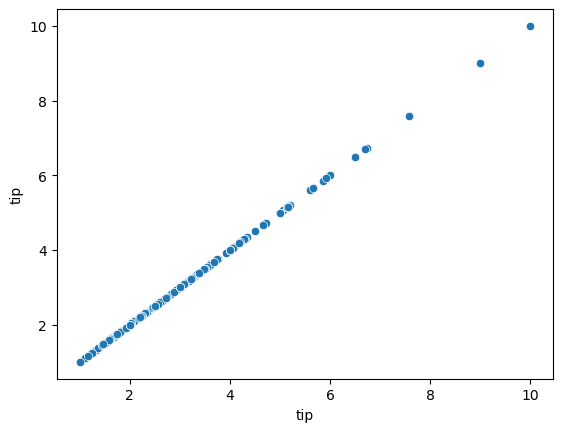

In [93]:
sns.scatterplot(x='tip',y='tip',data=df)        #strong realationship

In [94]:
df.head(1)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2


<AxesSubplot:xlabel='total_bill', ylabel='tip'>

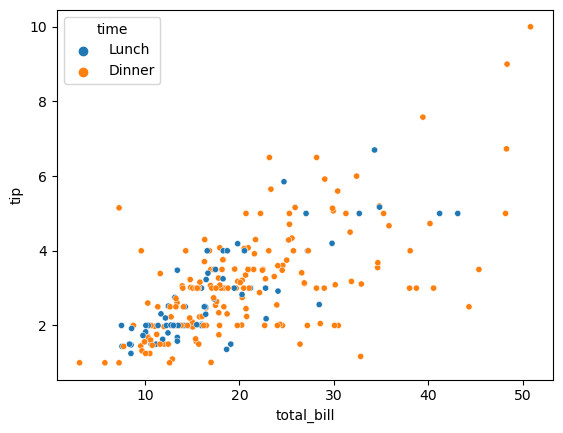

In [104]:
sns.scatterplot(x='total_bill',y='tip',data=df,s=20,hue='time')        #weak realationship

<AxesSubplot:xlabel='total_bill', ylabel='tip'>

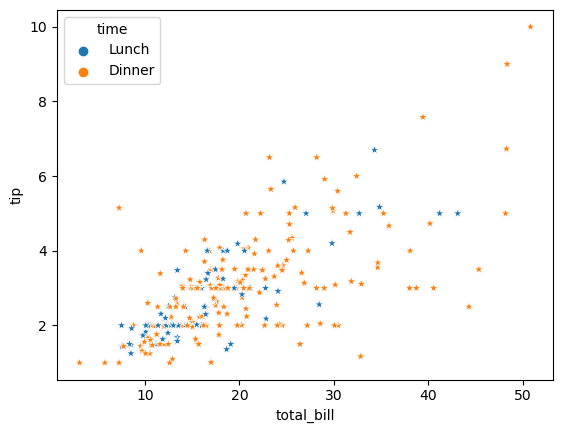

In [107]:
sns.scatterplot(x='total_bill',y='tip',data=df,marker='*',s=50,hue='time')        #strong realationship

**distribution**       #for continuos data

In [111]:
df['tip'].max()

10.0

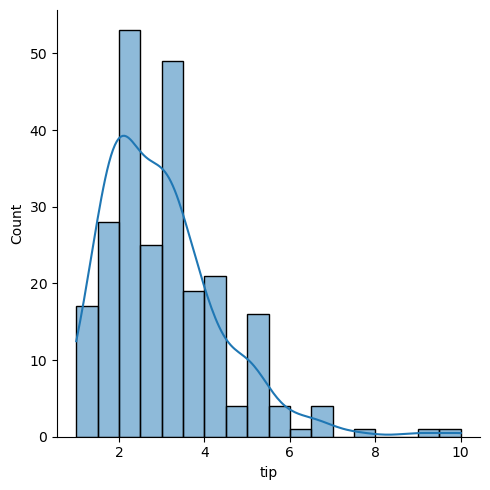

In [116]:
sns.displot(x='tip',data=df,kde=True)             #kam wahed dafa3 tip mn 1:1.5         #normal distribution  

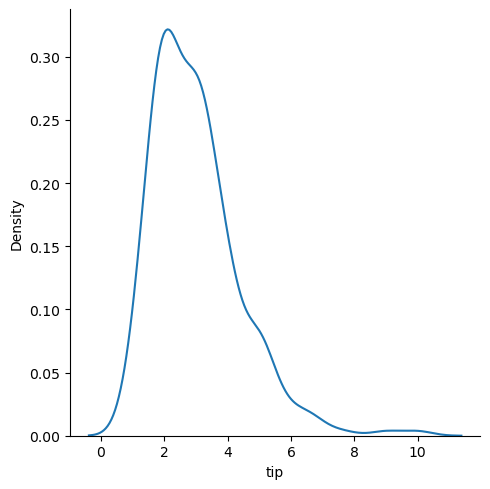

In [117]:
sns.displot(x='tip',data=df,kind='kde')

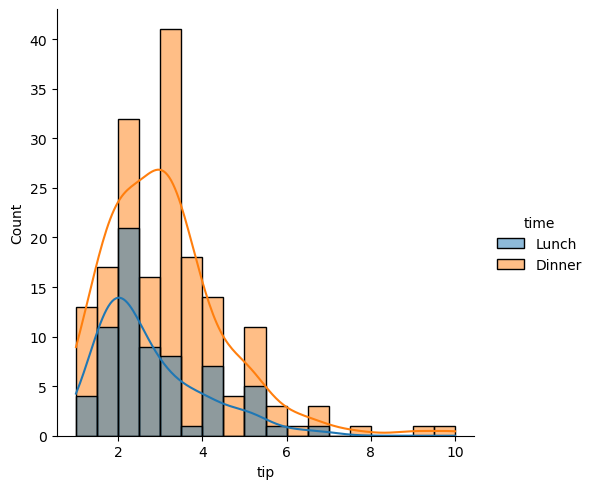

In [122]:
sns.displot(x='tip',data=df,kde=True,hue='time')       #(hue)compare between two column

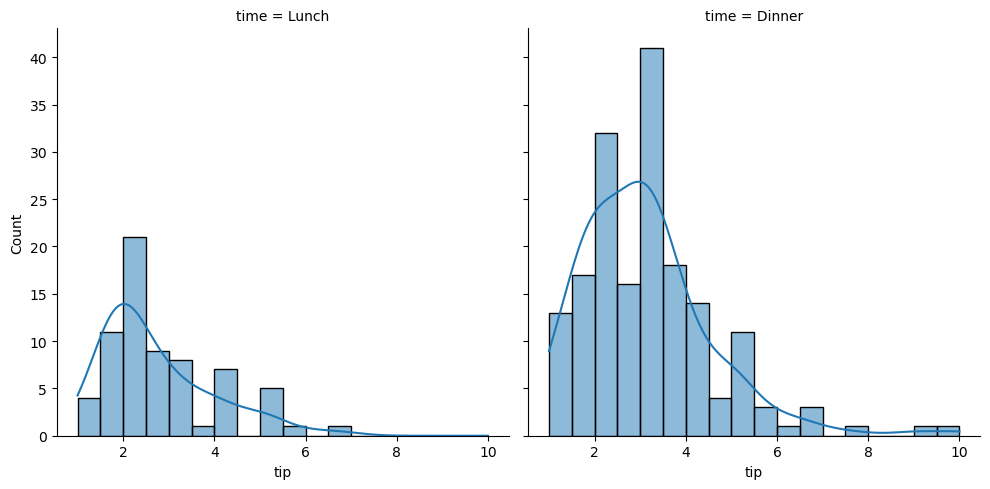

In [123]:
sns.displot(x='tip',data=df,kde=True,col='time')       #(col)compare between two column instead of (hue)

<AxesSubplot:xlabel='size', ylabel='count'>

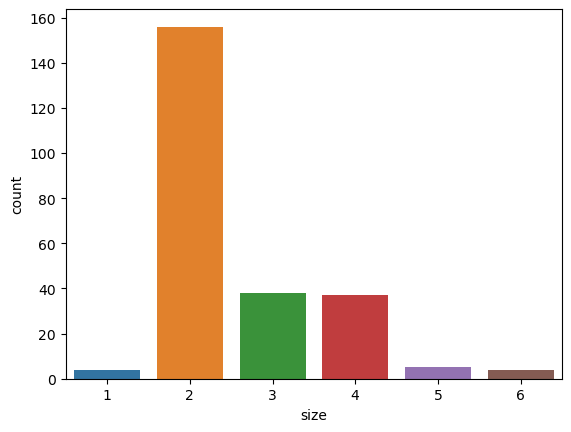

In [121]:
sns.countplot(x='size',data=df)         #discrete data

## PairPlot and Joint Plot

## jointplot

jointplot() allows you to basically match up two distplots for bivariate data. With your choice of what **kind** parameter to compare with: 
* “scatter” 
* “kde” 

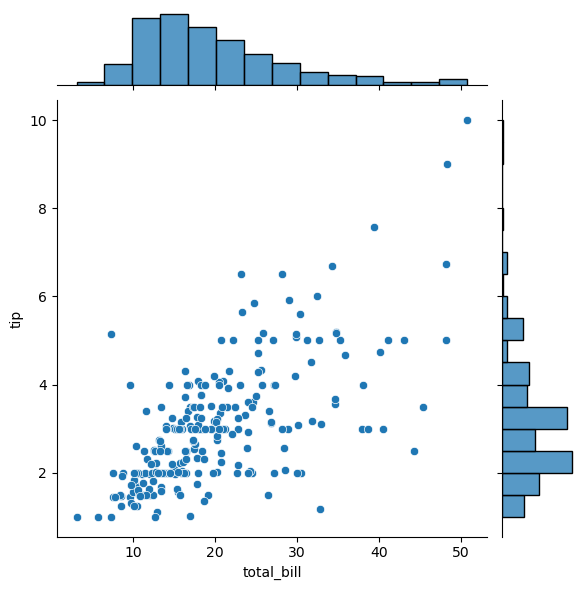

In [129]:
sns.jointplot(x='total_bill',y='tip',data=df,kind='scatter')          #default scatter

## pairplot

pairplot will plot pairwise relationships across an entire dataframe (for the numerical columns) and supports a color hue argument (for categorical columns). 

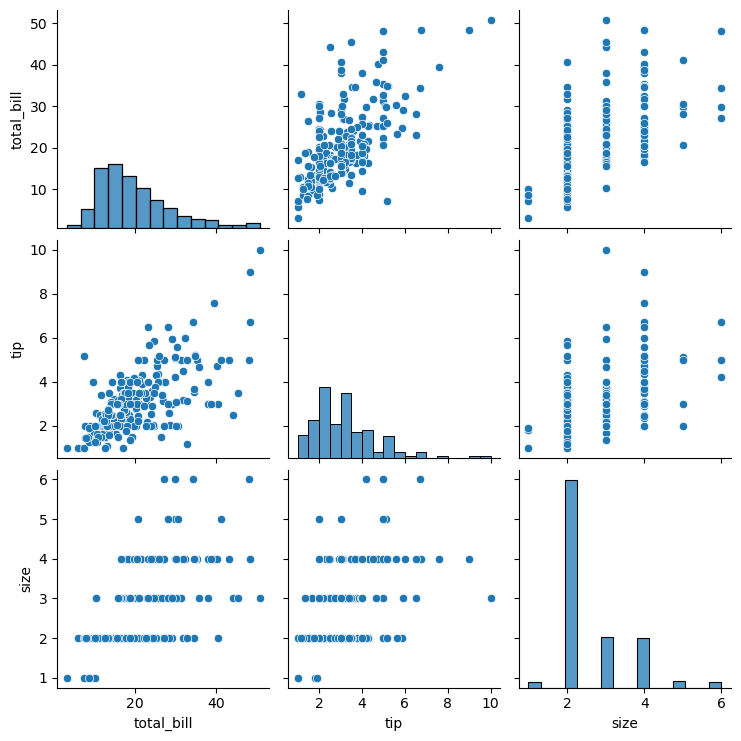

In [130]:
sns.pairplot(df)            #summarize all information od dataframe

**scatter_________> detect relationship between two continous numerical variables**

**strip_________> detect relationship between two continous and categorical variables(discrete)**


# Matrix Plots

Matrix plots allow you to plot data as color-encoded matrices and can also be used to indicate clusters within the data (later in the machine learning section we will learn how to formally cluster data).

## Heatmap

In order for a heatmap to work properly, your data should already be in a matrix form, the sns.heatmap function basically just colors it in for you. For example:

In [131]:
df.corr()           #show the relationship between col is strong or not  (with numbers)

,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


<AxesSubplot:>

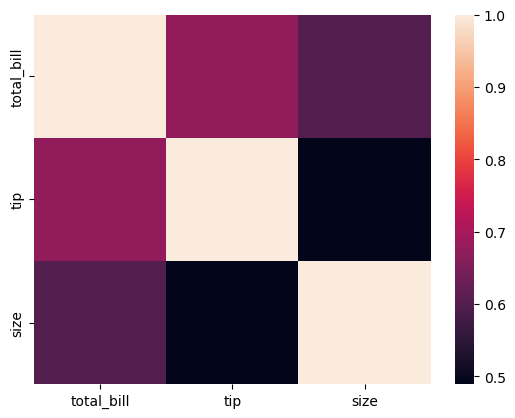

In [132]:
sns.heatmap(df.corr())      #show the relationship between col is strong or not  (with colors) 

<AxesSubplot:>

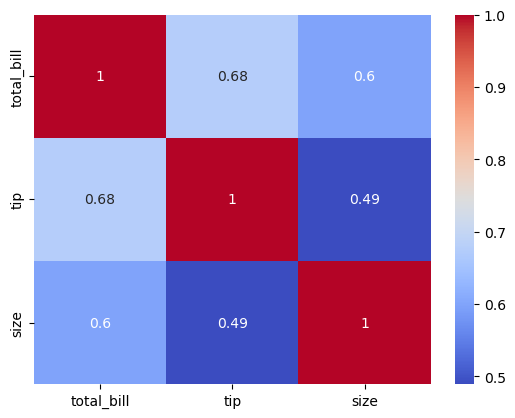

In [138]:
sns.heatmap(df.corr(),cmap='coolwarm',annot=True)      #show the relationship between col is strong or not  (with colors) 

## Pivot Table

In [145]:
df2=sns.load_dataset('flights')

URLError: <urlopen error [Errno 2] No such file or directory>